# 3. 별찍기 - 10
#### 골드5
[문제 링크](https://www.acmicpc.net/problem/2447)

In [ ]:
# 시에르핀스키 사각형

In [14]:
from math import sqrt

# 시에르핀스키 사각형을 만드는 함수
def make_sierpinski(k):
    # 최소단위인 가로세로 3인 경우
    if k == 1:
        return ['***', '* *', '***']
    # 한단계 작은 사각형의 가로세로 길이
    s_n = 3**(k-1)
    # 한단계 작은 사각형
    s_sier = make_sierpinski(k-1)
    # 한단계 작은 빈 사각형
    emp_sier = [' ' * s_n for _ in range(s_n)]
    # 이번 단계의 사각형
    sier = [[s_sier, s_sier, s_sier], [s_sier, emp_sier, s_sier], [s_sier, s_sier, s_sier]]
    # 이번 단계의 사각형을 줄별로 합쳐줌
    sier = sier_line_comb(sier)
    return sier

# 시에르핀스키 사각형을 줄별로 합쳐주는 함수
def sier_line_comb(sier):
    new = []
    for i in range(3):
        new.extend(sier_line_comb_one_third(sier[i]))
    return new
# 시에르핀스키 사각형의 1/3단위로 받아 줄별로 합쳐주는 함수 
def sier_line_comb_one_third(sier_one_third):
    new = ['' for _ in range(len(sier_one_third[0]))]
    for i in range(3):
        for j in range(len(sier_one_third[i])):
            new[j] += sier_one_third[i][j]
    return new
# 줄별로 합쳐주는함수의 경우, for문이 너무 겹쳐져서
# 따로 나누어줌

n = int(input())
# 3**k = n
k = int(n**(1/3))
sier = make_sierpinski(k)
for i in range(n):
    print(sier[i])

***************************
* ** ** ** ** ** ** ** ** *
***************************
***   ******   ******   ***
* *   * ** *   * ** *   * *
***   ******   ******   ***
***************************
* ** ** ** ** ** ** ** ** *
***************************
*********         *********
* ** ** *         * ** ** *
*********         *********
***   ***         ***   ***
* *   * *         * *   * *
***   ***         ***   ***
*********         *********
* ** ** *         * ** ** *
*********         *********
***************************
* ** ** ** ** ** ** ** ** *
***************************
***   ******   ******   ***
* *   * ** *   * ** *   * *
***   ******   ******   ***
***************************
* ** ** ** ** ** ** ** ** *
***************************


## 실패
- 메모리 초과 처음봄;
    - 리스트로 하나하나 생성하는 방식이다보니 문제가 된듯.
    - 전체 크기로 만든뒤 하나씩 구멍을 만들어주는 방식으로 해봐야 할듯.

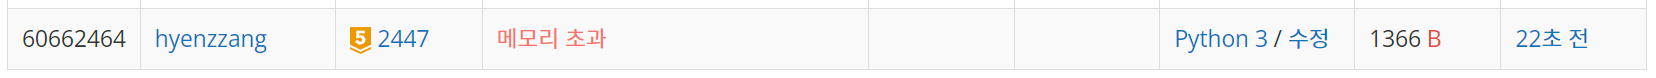

In [19]:
from math import sqrt

sier = None

# 시에르핀스키 사각형에 구멍을 뚫는 함수
def make_sierpinski(start, n):
    global sier
    # 사각형이 1이면 더이상 구멍을 뚫지 않음
    if n == 1: return
    
    # 작은 사각형의 가로세로 길이
    small_n = n//3
    # 작은 사각형의 시작점들
    small_starts = []
    for i in range(3):
        for j in range(3):
            small_starts.append((start[0]+(i*small_n), start[1]+(j*small_n)))
            
    for small_start in small_starts:
        # 작은 사각형의 시작점이 구멍이 뚫려야하는 곳이면(가운데)
        if small_start == (start[0]+small_n, start[1]+small_n):
            # 작은 사각형의 시작점부터 작은 사각형의 가로세로 길이만큼
            # 구멍을 뚫음
            for i in range(small_start[0], small_start[0]+small_n):
                for j in range(small_start[1], small_start[1]+small_n):
                    sier[i][j] = ' '
        # 작은 사각형의 시작점이 가운데가 아니면
        else:
            # 작은사각형에 대해 다시 구멍을 뚫음
            make_sierpinski(small_start, small_n)
    return



n = int(input())

sier = [[ '*' for _ in range(n)] for _ in range(n)]
    
start = (0,0)
make_sierpinski((0,0),n)

for i in range(n):
    for j in range(n):
        print(sier[i][j], end='')
    print()

*********
* ** ** *
*********
***   ***
* *   * *
***   ***
*********
* ** ** *
*********


## 성공
- 작은 사각형은 생성한뒤 합치는 알고리즘에서 바꿈.
    - 미리 만들어진 사각형에 구멍을 뚫어주는 방향으로 변경.
    - 메모리오류 해결.
- 구멍을 뚫어주는 것보다, 필요할 곳만 *로 바꾸어 주는게 더 간결할것 같음

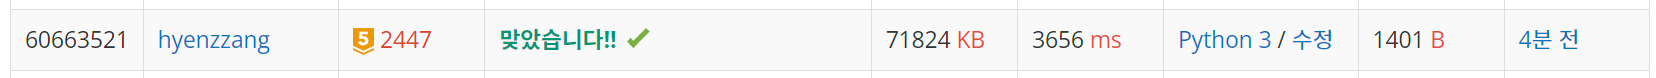

In [21]:
from math import sqrt
sier = None
# 시에르핀스키 사각형을 그려주는 함수
def make_sierpinski(start, n):
    global sier
    # 사각형이 1이면 
    if n == 1: 
        # 해당 위치를 별로 채움
        sier[start[0]][start[1]] = '*'
        return
    
    # 작은 사각형의 가로세로 길이
    small_n = n//3
    # 작은 사각형의 시작점들을 저장할 리스트
    small_starts = []
    for i in range(3):
        for j in range(3):
            # 작은 사각형의 시작점이 구멍이 있어야 하는 곳이면(가운데)
            if (i,j) == (1,1):
                # 해당 사각형은 건너뜀
                continue
            # 작은 사각형의 시작점이 가운데가 아니면
            else:
                # 작은 사각형의 시작점을 찾고
                small_start = (start[0]+(i*small_n), start[1]+(j*small_n))
                # 작은사각형에 대해 *을 채워줌
                make_sierpinski(small_start, small_n)
    return

n = int(input())
sier = [[ ' ' for _ in range(n)] for _ in range(n)]
start = (0,0)
make_sierpinski(start,n)
for i in range(n):
    for j in range(n):
        print(sier[i][j], end='')
    print()

*********
* ** ** *
*********
***   ***
* *   * *
***   ***
*********
* ** ** *
*********


## 성공
- 빈 사각형에 *을 채우는 방식이 간결함.
    - 마지막단계 재귀에서 한칸에만 *을 그려주면 되기때문.

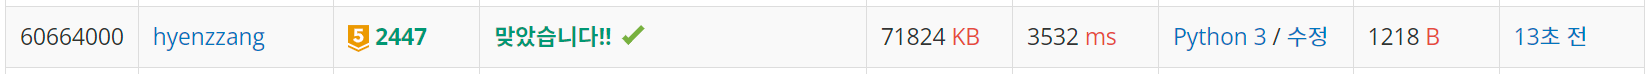